# The Dataset

The dataset I am using for my final project is a documentation of property sales in Brooklyn from 2003-2017. The target variable I would like to predict in this dataset is the sale price of the properties. I believe the ability to predict the sales price could benefit both buyers and sellers by making these often large transactions more transparent and informative. I will beging with a rudimentary model that uses all the features to predict sales price. Depending on the outcome, I will narrow the features down. I am currently eyeing things like square feet and zip code as good feature variables to predict the sale prices. My ultimate goal is to get a R-squared/target score of 80%. I think the biggest risk or limitation is the overwhelming amount of data included in the dataset. This could make things difficult in terms of finding the right variables to predict the target variable. 

In [1]:
#Here I am importing all the necessary libraries I may need for analysis


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#Reading in of the dataset

brooklyn = pd.read_csv("brooklyn_sales_map.csv")

In [3]:
#What does the dataset look like?

brooklyn.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,building_class,address,zip_code,...,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,Version,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,R5,330 JAY STREET,11201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,G7,85 JAY STREET,11201,...,988208.0,195011.0,12d,NaN,302 016,30101.0,NaN,17V1.1,1560.0,140132.0
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,O6,29 COLUMBIA HEIGHTS,11201,...,985952.0,195007.0,12d,NaN,302 004,30106.0,NaN,17V1.1,891.0,34656.0
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,K6,5120 AVENUE U,11234,...,1006597.0,161424.0,23b,NaN,319 077,32502.0,NaN,17V1.1,3730.0,797555.0
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,H8,21 CLARK STREET,11201,...,985622.0,193713.0,12d,NaN,302 014,30106.0,NaN,17V1.1,621.0,21360.0


In [4]:
#Further look at the dataset

brooklyn.tail()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,building_class,address,zip_code,...,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,Version,SHAPE_Leng,SHAPE_Area
390876,390877,3,WYCKOFF HEIGHTS,29 COMMERCIAL GARAGES,4,3371,21,G9,1402 MADISON STREET,11237,...,1009164.0,193491.0,13d,NaN,309 053,31107.0,NaN,17V1.1,206.0,1697.0
390877,390878,3,WYCKOFF HEIGHTS,29 COMMERCIAL GARAGES,NaN,3379,58,NaN,802 WYCKOFF AVENUE,11237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390878,390879,3,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,1,3337,19,C0,364 LINDEN STREET,11237,...,1008466.0,194283.0,13b,NaN,309 052,31106.0,NaN,17V1.1,244.0,2501.0
390879,390880,3,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,1,3337,19,C0,364 LINDEN STREET,11237,...,1008466.0,194283.0,13b,NaN,309 052,31106.0,NaN,17V1.1,244.0,2501.0
390880,390881,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3280,50,Z9,383 HARMAN STREET,11237,...,1007172.0,194967.0,13b,NaN,309 050,31104.0,NaN,17V1.1,231.0,2796.0


In [5]:
#I am getting rid of the first column since it's just added space

brooklyn = brooklyn.drop(brooklyn.columns[0], axis=1)

In [6]:
#How many rows and columns are in the dataset?

brooklyn.shape

(390881, 81)

In [7]:
#What are the columns I am working with?

brooklyn.columns

Index(['borough', 'neighborhood', 'building_class_category', 'tax_class',
       'block', 'lot', 'building_class', 'address', 'zip_code',
       'residential_units', 'commercial_units', 'total_units', 'land_sqft',
       'gross_sqft', 'year_built', 'tax_class_at_sale',
       'building_class_at_sale', 'sale_price', 'year_of_sale', 'CD', 'CT2010',
       'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'SanitBoro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'SplitZone', 'BldgClass', 'LandUse',
       'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea',
       'ResArea', 'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'UnitsTotal', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth',
       'ProxCode', 'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand',
       'AssessTot', 'ExemptLand', 'ExemptTot', 'YearBuilt', 'YearAlter1',
       'YearAlter2', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR'

In [8]:
#What are the data types of each column?

brooklyn.dtypes

borough                      int64
neighborhood                object
building_class_category     object
tax_class                   object
block                        int64
lot                          int64
building_class              object
address                     object
zip_code                     int64
residential_units            int64
commercial_units             int64
total_units                  int64
land_sqft                  float64
gross_sqft                 float64
year_built                   int64
tax_class_at_sale            int64
building_class_at_sale      object
sale_price                   int64
year_of_sale                 int64
CD                         float64
CT2010                     float64
CB2010                     float64
SchoolDist                 float64
Council                    float64
ZipCode                    float64
FireComp                    object
PolicePrct                 float64
HealthCent                 float64
HealthArea          

In [9]:
#How many null values are in each column?

#It looks like some columns have an enormous amount of null values, so a good amount of cleaning will need to be done.

brooklyn.isna().sum()

borough                         0
neighborhood                    0
building_class_category        83
tax_class                    6932
block                           0
lot                             0
building_class               6932
address                         1
zip_code                        0
residential_units               0
commercial_units                0
total_units                     0
land_sqft                       0
gross_sqft                      0
year_built                      0
tax_class_at_sale               0
building_class_at_sale          0
sale_price                      0
year_of_sale                    0
CD                          87153
CT2010                      87445
CB2010                      88366
SchoolDist                  87193
Council                     87153
ZipCode                     87153
FireComp                    87401
PolicePrct                  87153
HealthCent                  87153
HealthArea                  87153
SanitBoro     

In [10]:
#Here I am looking at basic summary statistics for the numeric columns

brooklyn.describe()

,borough,block,lot,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,...,CommFAR,FacilFAR,BoroCode,BBL,Tract2010,XCoord,YCoord,TaxMap,SHAPE_Leng,SHAPE_Area
count,390881.0,390881.000000,390881.000000,390881.000000,390881.000000,390881.000000,390881.000000,3.908810e+05,3.908810e+05,390881.000000,...,303728.000000,303728.000000,303728.0,3.037280e+05,303728.000000,3.037280e+05,303728.000000,303710.000000,303728.000000,3.037280e+05
mean,3.0,4275.637813,272.505711,11208.429059,2.486151,0.174143,2.673241,2.368476e+03,2.970892e+03,1701.675014,...,0.153269,2.854452,3.0,3.045066e+09,4715.545455,9.921077e+05,175146.073694,31396.728152,337.445772,8.645885e+03
std,0.0,2642.765497,484.656393,361.208759,48.200301,1.653366,48.233466,2.509135e+04,1.453964e+04,636.754357,...,0.811046,1.428790,0.0,2.571172e+07,17545.128104,7.391759e+04,18390.569903,754.905314,329.587454,3.116106e+04
min,3.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,3.0,3.000010e+09,0.000000,0.000000e+00,0.000000,3.000000,2.143758,1.007072e-01
25%,3.0,1786.000000,21.000000,11209.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1905.000000,...,0.000000,2.000000,3.0,3.018440e+09,246.000000,9.892368e+05,165334.750000,30611.000000,238.998783,1.938904e+03
50%,3.0,4305.000000,45.000000,11219.000000,1.000000,0.000000,1.000000,1.900000e+03,1.820000e+03,1925.000000,...,0.000000,2.000000,3.0,3.047920e+09,440.000000,9.975955e+05,175906.000000,31506.000000,249.411350,2.316886e+03
75%,3.0,6584.000000,94.000000,11230.000000,2.000000,0.000000,2.000000,2.500000e+03,3.000000e+03,1954.000000,...,0.000000,4.800000,3.0,3.066810e+09,810.000000,1.005059e+06,187140.000000,32005.000000,283.169119,3.478477e+03
max,3.0,8955.000000,9133.000000,33803.000000,20811.000000,355.000000,20811.000000,7.446955e+06,2.548000e+06,2017.000000,...,12.000000,12.000000,3.0,3.089550e+09,118202.000000,1.024202e+06,208406.000000,32605.000000,19862.000000,7.149338e+06


In [11]:
#Here I am looking at basic summary statistics for the non-numeric columns

brooklyn.describe(include='object')

,neighborhood,building_class_category,tax_class,building_class,address,building_class_at_sale,FireComp,SanitSub,Address,ZoneDist1,SplitZone,BldgClass,OwnerType,OwnerName,IrrLotCode,ZoneMap,ZMCode,Sanborn,EDesigNum,Version
count,390881,390798,383949,383949,390880,390881,303480,302952,303705,303714,303706,303706,53494,303624,303706,303728,6112,303710,3554,303728
unique,63,88,10,183,226076,187,102,33,151112,78,2,163,5,138727,2,32,1,1542,115,1
top,BEDFORD STUYVESANT,02 TWO FAMILY HOMES,1,C0,2 NORTHSIDE PIERS,C0,L170,2B,175 ADAMS STREET,R6,N,C0,P,CLINTON HILL APARTMEN,N,17a,Y,306 049,E-138,17V1.1
freq,27279,106127,198969,39996,650,38691,10093,17504,692,62851,288557,39508,52318,758,252341,32613,6112,1047,688,303728


# First-Pass Model

In [12]:
#I am only using numeric data for the first-pass model as a matter of simplicity

#I do believe there are categorical variables that will be useful as explanatory variables in an improved model

brooklyn_numeric = brooklyn.select_dtypes(['int64', 'float64']).dropna()

In [13]:
#How many rows and columns in the numeric dataset?

brooklyn_numeric.shape

(301603, 61)

In [14]:
#Here I am double checking that the dropna method worked

brooklyn_numeric.isna().sum()

borough              0
block                0
lot                  0
zip_code             0
residential_units    0
commercial_units     0
total_units          0
land_sqft            0
gross_sqft           0
year_built           0
tax_class_at_sale    0
sale_price           0
year_of_sale         0
CD                   0
CT2010               0
CB2010               0
SchoolDist           0
Council              0
ZipCode              0
PolicePrct           0
HealthCent           0
HealthArea           0
SanitBoro            0
SanitDistr           0
LandUse              0
Easements            0
LotArea              0
BldgArea             0
ComArea              0
ResArea              0
                    ..
NumBldgs             0
NumFloors            0
UnitsRes             0
UnitsTotal           0
LotFront             0
LotDepth             0
BldgFront            0
BldgDepth            0
ProxCode             0
LotType              0
BsmtCode             0
AssessLand           0
AssessTot  

In [15]:
#Separating the variables between X and y

X = brooklyn_numeric.drop('sale_price', axis='columns')
y = brooklyn_numeric.loc[:, 'sale_price']

In [16]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [17]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.16422196008958026
0.09809520558622087


### First Impressions

The model does indeed perform better than the null model, however the training model only captured 16% of the variance and the test model captured even less variance at 9%. So, even though my model performed better than the null model, its performance was so poor that it's not worth touting. I believe my model is suffering from both high bias and high variance. It has high bias because it performed so poorly on both the training set and test set. It has high variance because it performed better on the training set than the test set.

# Exploring the Data

In [19]:
#Here I am taking a quick look to see what variables are closely correlated with sale_price

#There does not seem to be any variable that is either strongly positively or negatively correlated with sale_price

#The Gross Square Footage is calculated from the outside of the exterior walls and is inclusive of all space within minus 
#areas that are open to below. Gross Square Feet is the total area of enclosed space measured to the exterior walls of a 
#building. This is an umbrella term that includes everything in a facility, even unusable spaces (think areas in between walls).
#It’s the total space a facility takes up regardless of whether or not the space is used. GSF is an important metric for 
#planning and budgeting in construction as well as benchmarking for operations and maintenance.


#ComArea is an estimate of the exterior dimensions of the portion of the structure(s) allocated for commercial use.
#Originally square footage in CAMA came from sketches, but, for both new construction and alterations, it now comes from 
#site visits. Basement square footage may be included in COMMERCIAL FLOOR: Finished, Active, Publicly accessible.
#For condominiums, COMMERCIAL FLOOR AREA is the sum of the commercial floor area for condominium lots with the same billing lot.
#COMMERCIAL FLOOR AREA does not contain the condominium’s common area. A COMMERCIAL FLOOR AREA of zero can mean it is either 
#not available or not applicable.


brooklyn.corr().loc[:, 'sale_price'].sort_values(ascending=False)

sale_price           1.000000
gross_sqft           0.265927
ComArea              0.238462
CommFAR              0.103668
commercial_units     0.098285
AssessTot            0.085522
BuiltFAR             0.082825
land_sqft            0.076056
tax_class_at_sale    0.074092
LandUse              0.071450
AssessLand           0.067559
year_of_sale         0.065381
SHAPE_Leng           0.061679
PolicePrct           0.060755
ExemptTot            0.060377
YearAlter1           0.056953
LotDepth             0.056245
LotArea              0.056153
ResidFAR             0.056104
LotFront             0.055374
BldgFront            0.053926
BldgDepth            0.053660
SHAPE_Area           0.051121
NumFloors            0.050376
FacilFAR             0.048789
BldgArea             0.047476
YearAlter2           0.040287
YCoord               0.039657
total_units          0.035328
residential_units    0.032021
                       ...   
HealthCent           0.018484
AreaSource           0.014594
Easements 

In [20]:
#One thing I noticed was there were repetitive columns like "zip_code" and "ZipCode"

#There were also columns that were basically all null like "ZMCode"

#So, the first thing I wanted to do was simply clean the dataset of duplicate and overly null columns


brooklyn = brooklyn.drop(['borough','address','building_class','ZipCode','Address','BldgClass','YearAlter1','YearAlter2',
                          'BoroCode','ZMCode','EDesigNum','tax_class','OwnerType','OwnerName','YearBuilt','SanitBoro','SanitSub',
                          'Version', 'total_units'], axis = 'columns')

In [21]:
#How many rows and columns after this cleaning?

brooklyn.shape

(390881, 62)

In [22]:
#Here I am dropping all ROWS with null values, once again this is out of simplicity.

brooklyn = brooklyn.dropna()

In [23]:
#We still have over 300,000 rows of data to work with after dropping null values from the rows.

brooklyn.shape

(301590, 62)

In [24]:
#Here I digging even deeper into the data, specifically the target variable of sale_price

brooklyn.loc[:,"sale_price"].value_counts()

0           109167
10            3093
450000        2062
600000        1929
400000        1919
550000        1838
650000        1768
350000        1696
300000        1672
700000        1540
500000        1535
750000        1479
250000        1405
200000        1342
800000        1310
425000        1153
900000        1096
850000        1042
475000        1039
375000        1031
150000        1010
575000         979
325000         952
1200000        948
525000         944
625000         885
360000         850
420000         841
950000         839
460000         829
             ...  
45839605         1
453958           1
6180178          1
196036           1
770276           1
6439124          1
6301849          1
1859600          1
301071           1
3467265          1
221168           1
155600           1
16900000         1
3719052          1
950100           1
450368           1
331578           1
857913           1
323334           1
143070           1
708290           1
532120      

In [25]:
#I am going to drop every row in which the documented sale price is 0.

#A sale price of 0 either means data was not collected correctly, or that there was some kind of non-monetary transaction.

#By discarding all values of 0 I believe I can make my dataset more logical.

brooklyn = brooklyn[brooklyn.sale_price != 0]

In [26]:
#Here I am checking again for anymore odd values and sure enough '10' shows up a lot


brooklyn.loc[:,"sale_price"].value_counts()

10           3093
450000       2062
600000       1929
400000       1919
550000       1838
650000       1768
350000       1696
300000       1672
700000       1540
500000       1535
750000       1479
250000       1405
200000       1342
800000       1310
425000       1153
900000       1096
850000       1042
475000       1039
375000       1031
150000       1010
575000        979
325000        952
1200000       948
525000        944
625000        885
360000        850
420000        841
950000        839
460000        829
430000        826
             ... 
313451          1
841561          1
532800          1
565584          1
372804          1
248297          1
207521          1
1215125         1
164500          1
438930          1
6202000         1
3822222         1
320088          1
479790          1
463398          1
6496800         1
22989341        1
191001          1
123384          1
375283          1
90600           1
17900000        1
454700          1
281037          1
98370     

In [27]:
#I don't believe you are going to be able to buy property for $10 so I am getting rid of all rows where sale_price = 10.

brooklyn = brooklyn[brooklyn.sale_price != 10]

In [28]:
#Once last double check

brooklyn.loc[:,"sale_price"].value_counts()

450000      2062
600000      1929
400000      1919
550000      1838
650000      1768
350000      1696
300000      1672
700000      1540
500000      1535
750000      1479
250000      1405
200000      1342
800000      1310
425000      1153
900000      1096
850000      1042
475000      1039
375000      1031
150000      1010
575000       979
325000       952
1200000      948
525000       944
625000       885
360000       850
420000       841
950000       839
460000       829
430000       826
560000       807
            ... 
212521         1
1702000        1
2250500        1
5585000        1
225313         1
694300         1
192529         1
681986         1
237501         1
87908          1
360289         1
278345         1
22340          1
237373         1
19060500       1
79592          1
781875         1
61139          1
7885           1
2903751        1
264052         1
38500000       1
401037         1
1472128        1
8763000        1
116342         1
583250         1
325200        

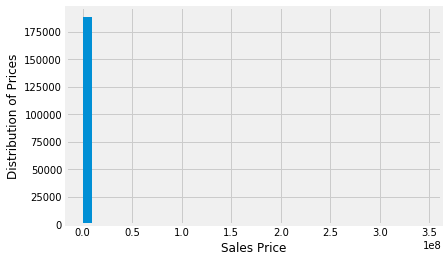

In [29]:
#After the cleaning, what does the distribution of sale_price look like?

#It doesn't look like I am getting any valuable insight about the data from this distribution.

ax = brooklyn.loc[:,"sale_price"].plot(kind='hist', bins = 35)
plt.ylabel("Distribution of Prices")
plt.xlabel("Sales Price");

In [30]:
#What is the median sale price of properties in Brooklyn?

#I am going to split the distribution into two based on the median

brooklyn.loc[:,"sale_price"].median()

494693.5

In [31]:
price_low = brooklyn[brooklyn.sale_price <= 494693]

In [32]:
price_high = brooklyn[brooklyn.sale_price > 494693]

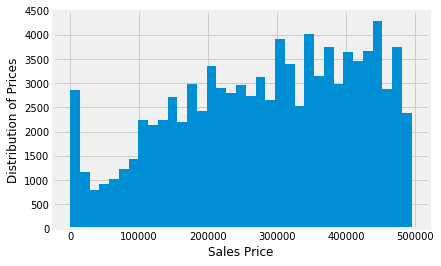

In [33]:
#What does the distribution of sale_price look like on the lower side?

#This looks much cleaner than before and approximately normally distributed.


ax = price_low.loc[:,"sale_price"].plot(kind='hist', bins = 35)
plt.ylabel("Distribution of Prices")
plt.xlabel("Sales Price");

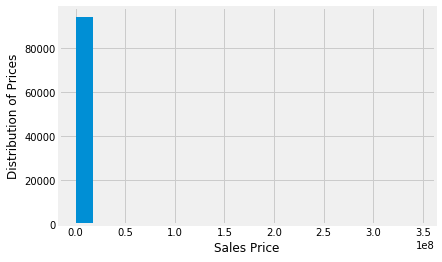

In [34]:
#What does the distribution of sale_price look like on the upper side?

#This looks like the first graph, but now it makes more sense in context with the lower half of the dataset.

#This dataset has a heavy skew on the upper side of the sale price.

ax = price_high.loc[:,"sale_price"].plot(kind='hist', bins = 20)
plt.ylabel("Distribution of Prices")
plt.xlabel("Sales Price");

In [35]:
#In the first run through of correlation with sale_price, gross_sqft had the highest correlation.

#So now that I have cleaned up 'sale_price' I am going to clean up gross_sqft.

#Like with sale_price there were a lot of values of 0.

brooklyn.loc[:,"gross_sqft"].value_counts()

0.0         42588
3000.0       2277
2400.0       1877
2700.0       1695
3600.0       1589
3300.0       1477
2160.0       1142
2000.0       1119
1800.0       1088
3200.0        917
3120.0        896
1920.0        848
4000.0        811
2100.0        808
2880.0        784
1440.0        783
2280.0        744
2520.0        726
2080.0        718
1600.0        698
3240.0        677
2800.0        633
2200.0        632
4500.0        620
3360.0        589
2640.0        587
2040.0        547
1760.0        545
4125.0        540
1280.0        524
            ...  
4804.0          1
49080.0         1
13975.0         1
18768.0         1
39510.0         1
111780.0        1
27084.0         1
6985.0          1
7190.0          1
78985.0         1
1033.0          1
12528.0         1
19740.0         1
11076.0         1
5846.0          1
21950.0         1
24240.0         1
47639.0         1
39444.0         1
223300.0        1
5955.0          1
4930.0          1
39432.0         1
157708.0        1
39425.0   

In [36]:
#Here I am getting rid of all properties where gross_sqft = 0 since that value doesn't make sense.

brooklyn = brooklyn[brooklyn.gross_sqft != 0.0]

In [37]:
#Double checking that it worked

brooklyn.loc[:,"gross_sqft"].value_counts()

3000.0      2277
2400.0      1877
2700.0      1695
3600.0      1589
3300.0      1477
2160.0      1142
2000.0      1119
1800.0      1088
3200.0       917
3120.0       896
1920.0       848
4000.0       811
2100.0       808
2880.0       784
1440.0       783
2280.0       744
2520.0       726
2080.0       718
1600.0       698
3240.0       677
2800.0       633
2200.0       632
4500.0       620
3360.0       589
2640.0       587
2040.0       547
1760.0       545
4125.0       540
1280.0       524
3750.0       502
            ... 
19700.0        1
18768.0        1
1119.0         1
5702.0         1
13975.0        1
39510.0        1
111780.0       1
27084.0        1
6985.0         1
7190.0         1
78985.0        1
1033.0         1
12528.0        1
19740.0        1
11076.0        1
5846.0         1
21950.0        1
24240.0        1
47639.0        1
39444.0        1
223300.0       1
5955.0         1
4930.0         1
39432.0        1
157708.0       1
39425.0        1
745.0          1
9749.0        

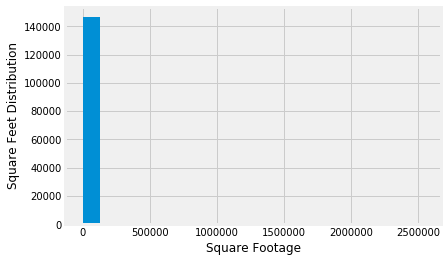

In [38]:
#Here is the distribution of gross_sqft

#Looks similar to sale_price

ax = brooklyn.loc[:,"gross_sqft"].plot(kind='hist', bins = 20)
plt.ylabel("Square Feet Distribution")
plt.xlabel("Square Footage");

In [39]:
#Just like with sale_price, I am dividing gross_sqft into two based on the median

brooklyn.loc[:,"gross_sqft"].median()

2500.0

In [40]:
sqft_low = brooklyn[brooklyn.gross_sqft <= 2500]

In [41]:
sqft_high = brooklyn[brooklyn.gross_sqft > 2500]

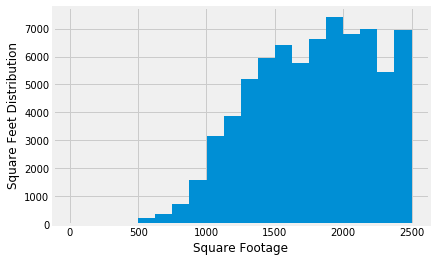

In [42]:
#Here is the distribution of gross_sqft on the lower side

#This looks much cleaner and approximately normally distributed

ax = sqft_low.loc[:,"gross_sqft"].plot(kind='hist', bins = 20)
plt.ylabel("Square Feet Distribution")
plt.xlabel("Square Footage");

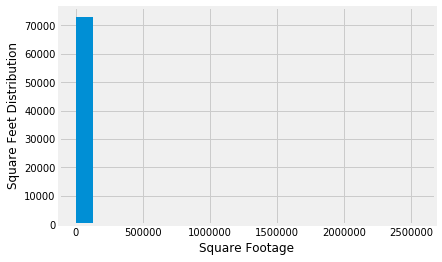

In [43]:
#Here is the distribution of gross_sqft on the upper side

#Like with sale_price it seems like there's a heavy skew towards the upper levels


ax = sqft_high.loc[:,"gross_sqft"].plot(kind='hist', bins = 20)
plt.ylabel("Square Feet Distribution")
plt.xlabel("Square Footage");

In [44]:
#After gross_sq_ft, ComArea was the variable correlated highest with sale_price

#Unlike sale_price and gross_sqft, a value of 0 for ComArea makes sense since not every property is for commercial use

#Since 0 is the most common value, this may indicate most properties are residential, not commercial

brooklyn.loc[:,"ComArea"].value_counts()

0.0         128706
1000.0         506
1100.0         364
2000.0         277
1500.0         252
2500.0         232
1600.0         215
1200.0         209
1800.0         182
900.0          174
800.0          171
5000.0         156
1400.0         152
1375.0         140
1089.0         130
4000.0         129
1300.0         124
10000.0        119
2200.0         115
3000.0         109
1250.0         104
2400.0         101
990.0          100
6000.0          96
1625.0          95
960.0           81
1700.0          81
1280.0          80
1900.0          79
1750.0          77
             ...  
92360.0          1
222738.0         1
2457.0           1
4915.0           1
11542.0          1
13930.0          1
78676.0          1
13938.0          1
19693.0          1
430.0            1
19700.0          1
11280.0          1
27900.0          1
3854.0           1
78985.0          1
1490.0           1
39425.0          1
39432.0          1
39439.0          1
2465.0           1
223300.0         1
1233.0      

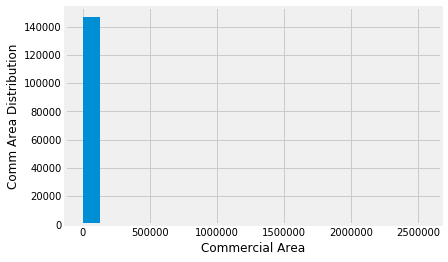

In [45]:
#What does the distribution of ComArea look like?

#At first glance it looks like this is another variable heavily skewed

ax = brooklyn.loc[:,"ComArea"].plot(kind='hist', bins = 20)
plt.ylabel("Comm Area Distribution")
plt.xlabel("Commercial Area");

In [46]:
#The median value for ComArea is 0, so that's tough to divide the distribution in two by the median since there aren't any 
#negative values

brooklyn.loc[:,"ComArea"].median()

0.0

In [47]:
#Instead, it is perhaps better to divide the distribution by its mean

brooklyn.loc[:,"ComArea"].mean()

821.4368687901215

In [48]:
area_low = brooklyn[brooklyn.ComArea <= 821]

In [49]:
area_high = brooklyn[brooklyn.ComArea > 821]

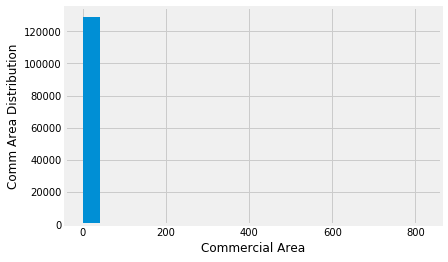

In [50]:
#What does the lower half of the distribution look like?

#Very skewed towards 0, as was expected

ax = area_low.loc[:,"ComArea"].plot(kind='hist', bins = 20)
plt.ylabel("Comm Area Distribution")
plt.xlabel("Commercial Area");

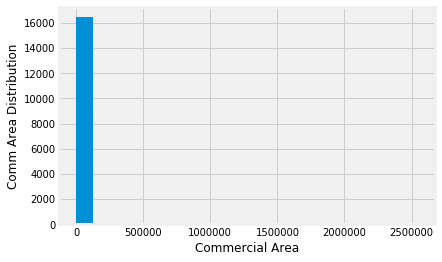

In [51]:
#What does the upper half of the distribution look like?

#I'm not sure, overall this distribution doesn't seem clear


ax = area_high.loc[:,"ComArea"].plot(kind='hist', bins = 20)
plt.ylabel("Comm Area Distribution")
plt.xlabel("Commercial Area");

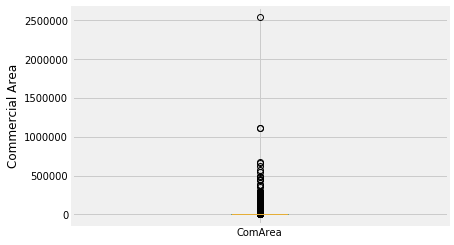

In [52]:
#Instead of a histogram, a box plot seems much better at plotting the distribution of ComArea

ax = brooklyn.loc[:,"ComArea"].plot(kind='box')
plt.ylabel("Commercial Area");

In [53]:
#One last explanatory variable I wanted to see was AssessTot

#It doesn't seem like there are any odd values throwing off this set

brooklyn.loc[:,"AssessTot"].value_counts()

12330.0      1084
10268.0      1036
14389.0       830
8210.0        787
18511.0       639
9045.0        618
26872.0       581
16449.0       581
35830.0       568
20571.0       558
34038.0       515
11493.0       514
7401.0        512
24661.0       497
23288.0       492
21496.0       484
32246.0       476
9852.0        465
24364.0       437
28663.0       414
25081.0       411
22602.0       409
20780.0       352
17914.0       346
22572.0       343
13136.0       338
25795.0       322
19704.0       321
11104.0       320
30456.0       318
             ... 
18910.0         1
29098.0         1
215725.0        1
41813.0         1
26965.0         1
29558.0         1
9386.0          1
300336.0        1
215700.0        1
28108.0         1
48643.0         1
12826.0         1
169112.0        1
107913.0        1
78484.0         1
41801.0         1
75140.0         1
150274.0        1
1008450.0       1
37563.0         1
1492650.0       1
26620.0         1
46646.0         1
167205.0        1
69364.0   

In [54]:
#Here I am making sure of there are any zeroes in the set

#And there's at least one, so I am going to clean that up since an assessed value of 0 might be possible, but most likely not

brooklyn.loc[:,"AssessTot"].min()

0.0

In [55]:
#Here I am cleaning up AssessTot

brooklyn = brooklyn[brooklyn.AssessTot != 0.0]

In [56]:
#Checking in on the dataset after several rounds of cleaning and the amount of data certainly has decreased

brooklyn.shape

(146719, 62)

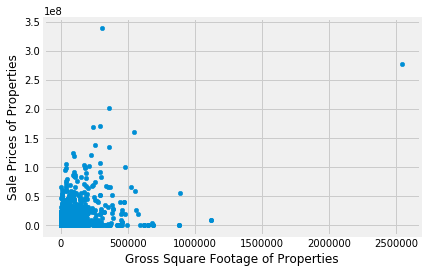

In [57]:
#How does gross_sqft relate to sale_price?

#I believe this plot reinforces the small correlation between gross_sqft and sale_price

ax = brooklyn.plot(kind='scatter', x='gross_sqft', y='sale_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Gross Square Footage of Properties");

In [58]:
#What if I transform the data through log transformation?

brooklyn.loc[:, 'log_sqft'] = np.log(brooklyn.loc[:, 'gross_sqft'])

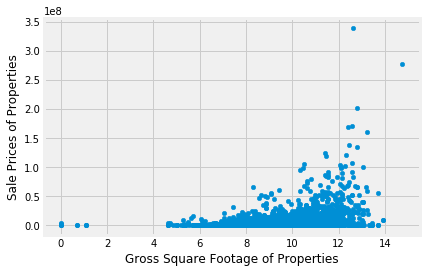

In [59]:
#This plot looks more informative

ax = brooklyn.plot(kind='scatter', x='log_sqft', y='sale_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Gross Square Footage of Properties");

In [60]:
brooklyn.loc[:, 'log_price'] = np.log(brooklyn.loc[:, 'sale_price'])

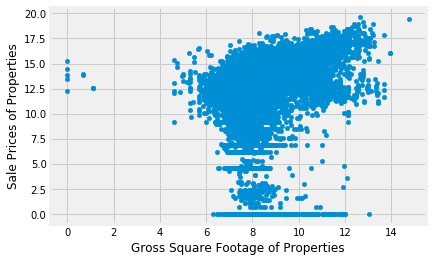

In [61]:
#This plot looks more informative when both the feature and target variable have log transformations

ax = brooklyn.plot(kind='scatter', x='log_sqft', y='log_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Gross Square Footage of Properties");

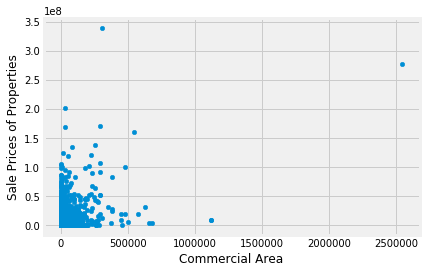

In [62]:
ax = brooklyn.plot(kind='scatter', x='ComArea', y='sale_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Commercial Area");

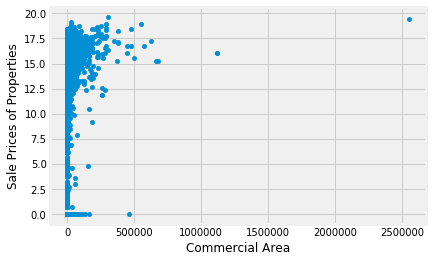

In [63]:
ax = brooklyn.plot(kind='scatter', x='ComArea', y='log_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Commercial Area");

In [64]:
#I said originally I did not want to eliminate ComArea values of 0

#However, log of 0 is undefined, so for this exercise I must do it

brooklyn = brooklyn[brooklyn.ComArea != 0.0]

In [65]:
brooklyn.loc[:, 'log_area'] = np.log(brooklyn.loc[:, 'ComArea'])

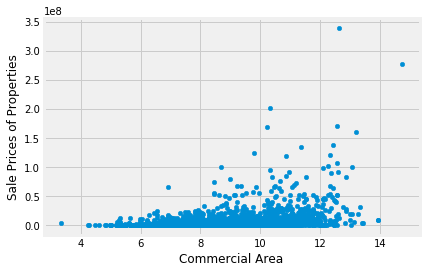

In [66]:
ax = brooklyn.plot(kind='scatter', x='log_area', y='sale_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Commercial Area");

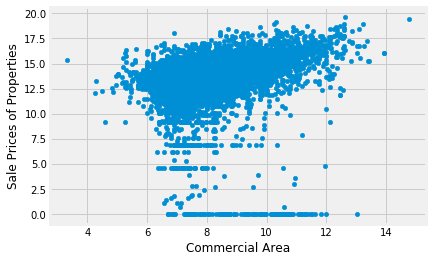

In [67]:
#There does indeed seem to be a small positive correlation between ComArea and sale_price

ax = brooklyn.plot(kind='scatter', x='log_area', y='log_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Commercial Area");

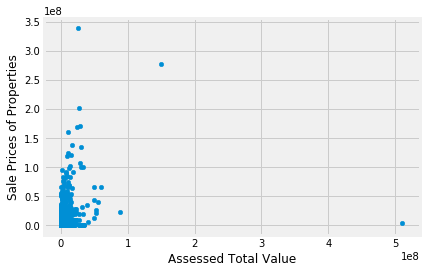

In [68]:
ax = brooklyn.plot(kind='scatter', x='AssessTot', y='sale_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Assessed Total Value");

In [69]:
brooklyn.loc[:, 'log_assess'] = np.log(brooklyn.loc[:, 'AssessTot'])

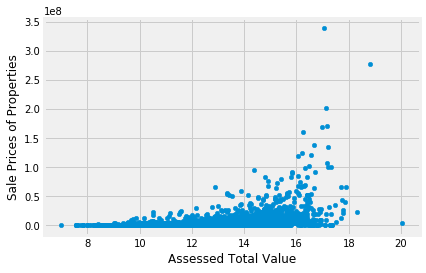

In [70]:
ax = brooklyn.plot(kind='scatter', x='log_assess', y='sale_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Assessed Total Value");

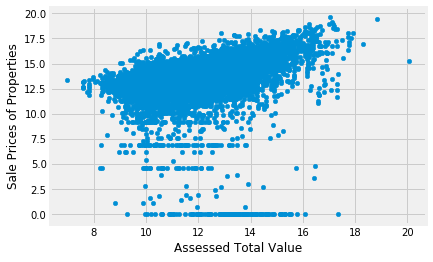

In [71]:
#The correlation between the log values of AssessTot and sale_price is more clear than their normal values

ax = brooklyn.plot(kind='scatter', x='log_assess', y='log_price')
plt.ylabel("Sale Prices of Properties")
plt.xlabel("Assessed Total Value");

In [72]:
#Here I am setting up a series to take a look at correlation between the log values

log_brooklyn = brooklyn.loc[:,['log_price','log_sqft','log_area','log_assess']]

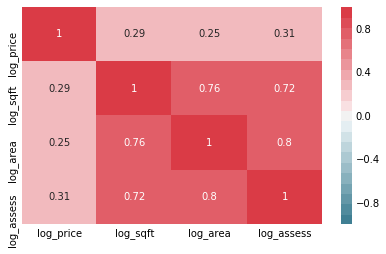

In [73]:
#Log transformation made the relationship between variables more clear

#I am slightly concerned about collinearity with log_area and log_assess.

#Collinearity is possible with log_sqft and log_area

#Collinearity is possible with log_sqft and log_assess

ax = sns.heatmap(log_brooklyn.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21))

# Categorical Variable Analysis

In [74]:
#There are some categorical variables in the dataset that I believe might be of use in making a sound predictive model.

#The idea is to turn these categorical variables into dummy variables in order to accurately measure their impact.

#Zip code has too many values to turn into dummy variables, so I will not use it.

brooklyn.loc[:,"zip_code"].value_counts()

11207    890
11220    795
11211    721
11221    661
11226    652
11212    617
11208    607
11237    606
11206    600
11233    581
11219    578
11203    561
11216    547
11222    524
11223    519
11214    503
11209    501
11213    476
11231    475
11215    474
11234    471
11218    460
11238    444
11204    427
11205    408
11236    401
11201    397
11232    386
11235    378
11230    363
11210    362
11229    359
11217    350
11225    346
11228    291
11224    182
11249    106
11239      5
11241      1
0          1
Name: zip_code, dtype: int64

In [75]:
#Neighborhood has too many values to turn into dummy variables, so I will not use it.

brooklyn.loc[:,"neighborhood"].value_counts()

BEDFORD STUYVESANT          1282
BOROUGH PARK                 972
CROWN HEIGHTS                960
EAST NEW YORK                877
BUSHWICK                     844
FLATBUSH-EAST                761
SUNSET PARK                  760
WILLIAMSBURG-EAST            731
FLATBUSH-CENTRAL             714
BAY RIDGE                    685
GREENPOINT                   519
BENSONHURST                  517
OCEAN HILL                   504
CYPRESS HILLS                423
BROWNSVILLE                  402
FLATBUSH-NORTH               393
CANARSIE                     389
GRAVESEND                    386
OCEAN PARKWAY-NORTH          319
SHEEPSHEAD BAY               301
WILLIAMSBURG-NORTH           270
GOWANUS                      269
MIDWOOD                      268
PARK SLOPE                   250
BATH BEACH                   249
RED HOOK                     238
WILLIAMSBURG-SOUTH           230
WYCKOFF HEIGHTS              225
BUSH TERMINAL                224
FLATBUSH-LEFFERTS GARDEN     211
          

In [76]:
#Tax class at sale looks promising to turn into a dummy variable.

brooklyn.loc[:,"tax_class_at_sale"].value_counts()

4    6948
1    6395
2    4681
3       2
Name: tax_class_at_sale, dtype: int64

In [77]:
#Block has too many values to turn into dummy variables, so I will not use it.

brooklyn.loc[:,"block"].value_counts()

3489    29
5195    26
3526    25
5026    24
1863    24
4915    23
8707    23
1465    22
3524    22
4141    22
6346    21
5165    21
5249    21
5141    21
3726    20
7598    20
1552    20
1551    20
7866    19
4869    19
7459    19
1226    19
1857    19
3183    19
6583    19
3188    18
7808    18
6247    17
3219    17
1149    17
        ..
4335     1
237      1
189      1
3111     1
1544     1
3555     1
5600     1
1560     1
3609     1
8377     1
1474     1
3641     1
7739     1
1608     1
7415     1
1062     1
5488     1
4269     1
3689     1
3301     1
3395     1
3721     1
2238     1
7473     1
5424     1
3363     1
1268     1
1030     1
6286     1
2049     1
Name: block, Length: 4437, dtype: int64

In [78]:
#Block has too many values to turn into dummy variables, so I will not use it.

brooklyn.loc[:,"lot"].value_counts()

1       1392
6        481
8        449
7        442
5        427
4        395
10       389
3        387
2        373
9        368
41       342
42       334
44       331
40       328
45       315
39       303
36       295
43       284
47       281
35       280
46       275
34       275
37       265
38       260
12       260
11       253
48       253
17       235
28       228
33       227
        ... 
238        1
428        1
126        1
149        1
437        1
261        1
423        1
318        1
601        1
334        1
537        1
505        1
441        1
194        1
242        1
377        1
309        1
1138       1
233        1
7501       1
169        1
510        1
317        1
509        1
968        1
600        1
184        1
435        1
430        1
914        1
Name: lot, Length: 300, dtype: int64

In [79]:
#SanitDistr is close to having too many values to turn into dummy variables, but I will still attempt to do so.

brooklyn.loc[:,"SanitDistr"].value_counts()

1.0     1850
3.0     1411
5.0     1345
11.0    1215
7.0     1147
17.0    1087
6.0     1073
4.0     1050
18.0     997
10.0     949
12.0     945
8.0      901
15.0     817
14.0     788
16.0     749
2.0      725
9.0      561
13.0     415
55.0       1
Name: SanitDistr, dtype: int64

In [80]:
#PolicePrct is close to having too many values to turn into dummy variables, but I will still attempt to do so.


brooklyn.loc[:,"PolicePrct"].value_counts()

75.0    1320
62.0    1175
67.0    1113
72.0    1104
66.0    1070
83.0    1065
90.0    1027
68.0     934
79.0     879
61.0     867
77.0     848
94.0     806
73.0     768
70.0     751
63.0     662
76.0     572
81.0     543
71.0     542
78.0     520
84.0     447
60.0     399
69.0     318
88.0     296
Name: PolicePrct, dtype: int64

In [81]:
#SchoolDist is close to having too many values to turn into dummy variables, but I will still attempt to do so.


brooklyn.loc[:,"SchoolDist"].value_counts()

20.0    2686
15.0    2245
14.0    2060
22.0    1749
17.0    1674
21.0    1437
13.0    1395
19.0    1332
32.0    1078
18.0     939
23.0     735
16.0     696
Name: SchoolDist, dtype: int64

In [82]:
#Building class at sale has too many values to turn into dummy variables, so I will not use it.

brooklyn.loc[:,"building_class_at_sale"].value_counts()

S2    4109
S1    1517
S9    1058
K1     930
S4     779
S3     773
S5     771
C7     709
F9     556
E9     537
K4     512
K2     441
K9     394
G9     393
G2     361
F4     257
O9     233
E1     201
E3     186
C0     177
O7     170
B1     157
M1     156
V1     105
D7     103
C2      99
F5      96
F1      92
C1      90
O8      85
      ... 
L1       2
P7       2
H8       2
W4       2
Z2       2
Y6       2
I3       2
J3       2
M2       2
J1       2
A3       2
W6       1
Y4       1
J9       1
O3       1
T9       1
Z8       1
A0       1
R0       1
H2       1
Y1       1
K8       1
Q3       1
Y3       1
T2       1
U4       1
U5       1
O4       1
H4       1
Z0       1
Name: building_class_at_sale, Length: 141, dtype: int64

In [83]:
#Building class category has too many values to turn into dummy variables, so I will not use it.


brooklyn.loc[:,"building_class_category"].value_counts()

02 TWO FAMILY HOMES                          4473
14  RENTALS - 4-10 UNIT                      3180
22  STORE BUILDINGS                          2195
01 ONE FAMILY HOMES                          1686
07  RENTALS - WALKUP APARTMENTS              1008
27  FACTORIES                                 991
29  COMMERCIAL GARAGES                        957
30  WAREHOUSES                                908
21  OFFICE BUILDINGS                          598
37  RELIGIOUS FACILITIES                      221
14 RENTALS - 4-10 UNIT                        201
08  RENTALS - ELEVATOR APARTMENTS             197
03 THREE FAMILY HOMES                         177
22 STORE BUILDINGS                            173
32  HOSPITAL AND HEALTH FACILITIES            151
31  COMMERCIAL VACANT LAND                    109
33  EDUCATIONAL FACILITIES                    106
41  TAX CLASS 4 - OTHER                        75
35  INDOOR PUBLIC AND CULTURAL FACILITIES      71
29 COMMERCIAL GARAGES                          65


In [84]:
#The first thing I want to do is convert my categorical variables into strings, this way it will allow them to become dummy variables

brooklyn = brooklyn.astype({'tax_class_at_sale':str, 'SanitDistr':str, 'PolicePrct': str, 'SchoolDist':str})

In [85]:
#Here I am setting up a smaller series to do analysis

brooklyn_dummy = brooklyn.loc[:,['log_price','tax_class_at_sale','SanitDistr','PolicePrct','SchoolDist']]

In [86]:
#Here I am officially converting the categorical variables into dummy variables

brooklyn_dummy = pd.get_dummies(brooklyn_dummy, columns=['tax_class_at_sale','SanitDistr','PolicePrct','SchoolDist'], drop_first=True)

In [87]:
#What does the dataset look like now?

brooklyn_dummy.head()

,log_price,tax_class_at_sale_2,tax_class_at_sale_3,tax_class_at_sale_4,SanitDistr_10.0,SanitDistr_11.0,SanitDistr_12.0,SanitDistr_13.0,SanitDistr_14.0,SanitDistr_15.0,...,SchoolDist_15.0,SchoolDist_16.0,SchoolDist_17.0,SchoolDist_18.0,SchoolDist_19.0,SchoolDist_20.0,SchoolDist_21.0,SchoolDist_22.0,SchoolDist_23.0,SchoolDist_32.0
2,19.644456,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.439337,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19.126250,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,18.957174,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,18.945409,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#I tried using a Seaborn heatmap, but it didn't look nice at all.

#There are some variables lightly correlated to the log of the sale price.

brooklyn_dummy.corr().loc[:, 'log_price'].sort_values(ascending=False)

log_price              1.000000
PolicePrct_84.0        0.123607
SanitDistr_2.0         0.108206
tax_class_at_sale_4    0.101250
SchoolDist_14.0        0.083758
SchoolDist_15.0        0.076339
PolicePrct_94.0        0.068740
SanitDistr_6.0         0.060141
PolicePrct_78.0        0.055243
PolicePrct_90.0        0.046658
tax_class_at_sale_2    0.044815
SchoolDist_20.0        0.044733
SanitDistr_10.0        0.034736
PolicePrct_68.0        0.034569
SchoolDist_21.0        0.033752
PolicePrct_62.0        0.032221
SanitDistr_11.0        0.030874
SanitDistr_15.0        0.030570
PolicePrct_61.0        0.028063
PolicePrct_88.0        0.025513
SanitDistr_7.0         0.023808
SanitDistr_14.0        0.023538
PolicePrct_76.0        0.023433
PolicePrct_70.0        0.022385
PolicePrct_66.0        0.021897
PolicePrct_72.0        0.021338
SanitDistr_12.0        0.017460
tax_class_at_sale_3    0.016105
SanitDistr_9.0         0.007129
SanitDistr_13.0        0.006989
PolicePrct_71.0        0.005318
SanitDis

# Improving the Model Part 1

In [89]:
#Here I am setting up a separate series to create a better predictive model.

new_regression = brooklyn.loc[:,['tax_class_at_sale','SanitDistr','PolicePrct','SchoolDist','log_price','log_sqft','log_assess','log_area']]

In [90]:
new_regression.head()

,tax_class_at_sale,SanitDistr,PolicePrct,SchoolDist,log_price,log_sqft,log_assess,log_area
2,4,2.0,84.0,13.0,19.644456,12.626919,17.052747,12.626919
3,4,18.0,63.0,22.0,19.439337,14.750819,18.824761,14.750819
4,4,2.0,84.0,13.0,19.126250,12.782686,17.117479,10.308953
6,4,2.0,84.0,13.0,18.957174,12.579152,17.158708,12.579152
7,2,1.0,94.0,14.0,18.945409,12.395717,16.992132,10.236382


In [91]:
new_regression = pd.get_dummies(new_regression, columns=['tax_class_at_sale','SanitDistr','PolicePrct','SchoolDist'], drop_first=True)

In [92]:
new_regression.head()

,log_price,log_sqft,log_assess,log_area,tax_class_at_sale_2,tax_class_at_sale_3,tax_class_at_sale_4,SanitDistr_10.0,SanitDistr_11.0,SanitDistr_12.0,...,SchoolDist_15.0,SchoolDist_16.0,SchoolDist_17.0,SchoolDist_18.0,SchoolDist_19.0,SchoolDist_20.0,SchoolDist_21.0,SchoolDist_22.0,SchoolDist_23.0,SchoolDist_32.0
2,19.644456,12.626919,17.052747,12.626919,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.439337,14.750819,18.824761,14.750819,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19.126250,12.782686,17.117479,10.308953,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,18.957174,12.579152,17.158708,12.579152,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,18.945409,12.395717,16.992132,10.236382,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#Separating the variables between X and y

X = new_regression.drop('log_price', axis='columns')
y = new_regression.loc[:, 'log_price']

In [94]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [95]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
#Scoring the model on the training set and test set.

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.14127694049819828
0.13817807663341786


### Observations

My new model did not capture as much of the variance as the first-pass model (14% to 16%). However, there is only a slight difference in R-squared values from my training set to my test set so I believe I reduced the variance problem greatly. I also believe the feature variables I have in my new model are cleaner and more logical than the first-pass model.

# Random Forest Regression

Using the same series (new_regression) I wanted to see if a Random Forest Regression would be a better predictive model than a standard linear regression

In [97]:
#Separating the variables between X and y

X2 = new_regression.drop('log_price', axis='columns')
y2 = new_regression.loc[:, 'log_price']

In [98]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .3, random_state=30)

In [99]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X2_train, y2_train)
print(rfr.score(X2_train, y2_train))
print(rfr.score(X2_test, y2_test))

0.7674510619616797
0.0201628194865473


This obvioulsy did not turn out well. The R-squared values for the training set and test set are so different that I don't really even know how to interpret the findings. Essentially the Random Forest model just seems very useless. 

# Further Feature Variable Analysis

In [100]:
#After lots of cleaning of the dataset, what other feature variables can I include in my model?

brooklyn.corr().loc[:, 'log_price'].sort_values(ascending=False)

log_price            1.000000
sale_price           0.364995
log_assess           0.307295
log_sqft             0.289953
log_area             0.250965
year_of_sale         0.212903
LotFront             0.197773
BldgFront            0.189912
SHAPE_Leng           0.176215
BldgArea             0.168297
gross_sqft           0.158795
BuiltFAR             0.148663
ComArea              0.145052
NumFloors            0.144699
BldgDepth            0.135731
CommFAR              0.131965
SHAPE_Area           0.118341
LotDepth             0.109287
UnitsTotal           0.104596
LotArea              0.103704
AssessTot            0.102366
land_sqft            0.102031
AssessLand           0.093902
commercial_units     0.091040
UnitsRes             0.089658
ResArea              0.084947
residential_units    0.078034
ResidFAR             0.065960
NumBldgs             0.056797
LandUse              0.043850
ExemptTot            0.038878
HealthCent           0.038406
Easements            0.032872
FacilFAR  

In [101]:
#SHAPE_Area is not in the dictionary, so even if it helps the model I will not use it.

#SHAPE_Leng is not in the dictionary, so even if it helps the model I will not use it.

#Year of sale might be very important, but I am going to leave it out of this analysis


In [102]:
#LotFront is the tax lot's frontage measured in feet.

#If a lot fronts on more than one street, the RPAD building address often determines which side of the lot used for 
#calculating lot frontage.


brooklyn.loc[:,"LotFront"].value_counts()

20.00     4460
25.00     2050
40.00      634
50.00      517
100.00     434
19.00      339
18.00      253
60.00      243
30.00      210
22.00      205
19.50      201
200.00     195
80.00      167
75.00      146
20.17      137
26.00      130
20.33      118
16.00      118
21.00      115
18.75      105
16.67       98
20.50       95
24.00       93
19.67       89
19.17       87
19.33       80
22.25       77
19.75       72
23.00       64
20.25       63
          ... 
650.00       1
683.25       1
397.00       1
104.67       1
491.83       1
160.92       1
47.75        1
343.00       1
43.83        1
111.25       1
38.17        1
756.00       1
105.60       1
109.42       1
80.08        1
59.67        1
44.92        1
148.50       1
137.56       1
212.00       1
133.17       1
189.83       1
81.83        1
50.57        1
24.44        1
63.67        1
70.92        1
348.75       1
38.75        1
181.25       1
Name: LotFront, Length: 1520, dtype: int64

In [103]:
#I am comfortable scrubbing all zero values for LotFront

brooklyn = brooklyn[brooklyn.LotFront != 0]

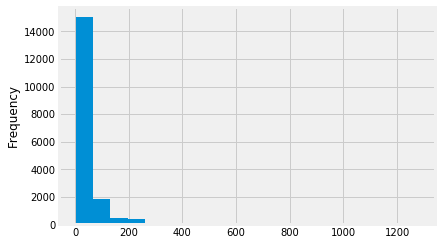

In [104]:
#What does the distribution of LotFront look like?

ax = brooklyn.loc[:,"LotFront"].plot(kind='hist', bins = 20)

In [105]:
brooklyn.loc[:, 'log_front'] = np.log(brooklyn.loc[:, 'LotFront'])

In [106]:
#BldgFront is the building’s frontage along the street measured in feet.

brooklyn.loc[:,"BldgFront"].value_counts()

20.00     5258
25.00     2115
50.00      544
40.00      525
19.00      465
18.00      379
22.00      368
100.00     333
30.00      264
60.00      263
19.50      213
21.00      208
16.00      181
26.00      162
24.00      157
80.00      155
75.00      139
0.00       136
23.00      129
17.00      117
200.00     116
18.75       97
20.50       95
16.67       95
19.67       95
35.00       93
27.00       90
28.00       87
90.00       79
15.00       74
          ... 
208.58       1
75.67        1
44.67        1
74.83        1
183.00       1
55.42        1
177.50       1
29.40        1
194.00       1
127.00       1
100.83       1
165.92       1
170.50       1
49.17        1
99.65        1
224.00       1
75.42        1
222.00       1
54.50        1
83.50        1
68.75        1
27.92        1
73.33        1
19.80        1
52.83        1
96.67        1
541.00       1
118.75       1
25.04        1
56.83        1
Name: BldgFront, Length: 978, dtype: int64

In [107]:
#I am comfortable scrubbing all zero values for BldgFront

brooklyn = brooklyn[brooklyn.BldgFront != 0]

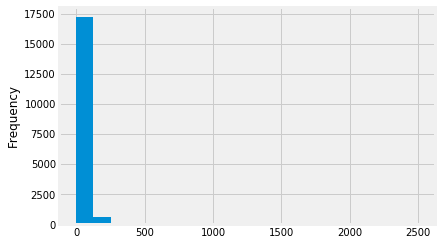

In [108]:
#What does the distribution of BldgFront look like?

ax = brooklyn.loc[:,"BldgFront"].plot(kind='hist', bins = 20)

In [109]:
brooklyn.loc[:, 'log_bldg'] = np.log(brooklyn.loc[:, 'BldgFront'])

In [110]:
#BldgArea is the total gross area in square feet, except for condominium measurements which come from the Condo 
#Declaration and are net square footage not gross.


brooklyn.loc[:,"BldgArea"].value_counts()

3300.0      441
3000.0      429
4000.0      275
3600.0      241
2400.0      188
5000.0      178
2000.0      167
2500.0      157
2700.0      154
3200.0      142
4500.0      141
6000.0      131
4400.0      131
10000.0     121
4800.0      114
3120.0      113
2200.0      112
4125.0      104
1800.0       98
2800.0       96
4200.0       90
3750.0       90
3240.0       83
2560.0       78
3360.0       76
4875.0       75
1600.0       72
2480.0       71
3135.0       71
3900.0       69
           ... 
3827.0        1
6210.0        1
9445.0        1
8950.0        1
3387.0        1
2012.0        1
6716.0        1
4272.0        1
6952.0        1
6467.0        1
43932.0       1
4796.0        1
5030.0        1
8175.0        1
27096.0       1
71500.0       1
5327.0        1
3894.0        1
14310.0       1
27090.0       1
23398.0       1
101790.0      1
5236.0        1
16206.0       1
41712.0       1
10467.0       1
2261.0        1
35741.0       1
10920.0       1
3591.0        1
Name: BldgArea, Length: 

In [111]:
#I am comfortable scrubbing all zero values for BldgArea

brooklyn = brooklyn[brooklyn.BldgArea != 0]

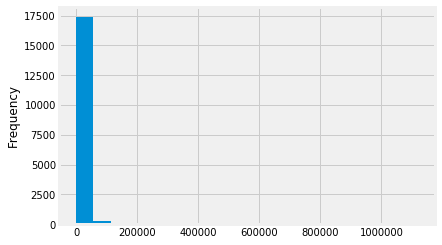

In [112]:
#What does the distribution of BldgArea look like?

ax = brooklyn.loc[:,"BldgArea"].plot(kind='hist', bins = 20)

In [113]:
brooklyn.loc[:, 'log_bldgarea'] = np.log(brooklyn.loc[:, 'BldgArea'])

In [114]:
#The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.

brooklyn.loc[:,"BuiltFAR"].value_counts()

1.00     1222
2.00      454
1.65      258
1.80      245
1.50      236
3.00      194
1.20      182
2.06      176
1.95      153
0.99      138
2.10      135
1.40      133
2.40      133
2.20      128
1.88      123
2.25      119
1.60      117
0.90      110
0.96      109
1.10      102
2.70       99
1.67       95
2.60       94
1.35       93
1.74       92
1.36       91
1.56       89
1.71       87
2.50       87
0.80       86
         ... 
20.28       1
5.81        1
6.81        1
7.67        1
8.08        1
8.18        1
5.45        1
15.00       1
6.95        1
7.87        1
6.32        1
4.17        1
5.52        1
6.24        1
11.48       1
7.57        1
4.63        1
8.42        1
8.64        1
8.27        1
12.22       1
7.08        1
9.00        1
14.00       1
6.73        1
5.38        1
5.36        1
11.01       1
10.46       1
5.11        1
Name: BuiltFAR, Length: 635, dtype: int64

In [115]:
#I am comfortable scrubbing all zero values for BuiltFAR

brooklyn = brooklyn[brooklyn.BuiltFAR != 0]

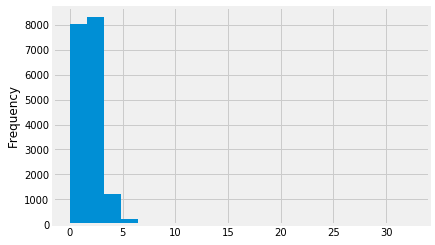

In [116]:
#What does the distribution of BuiltFAR look like?

ax = brooklyn.loc[:,"BuiltFAR"].plot(kind='hist', bins = 20)

In [117]:
brooklyn.loc[:, 'log_far'] = np.log(brooklyn.loc[:, 'BuiltFAR'])

In [118]:
#NumFloors is the number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.

#Above ground basements are not included in the NUMBER OF FLOORS.

#A roof used for parking, farming, playground, etc. is not included in NUMBER OF FLOORS.

brooklyn.loc[:,"NumFloors"].value_counts()

3.00     6550
2.00     4803
1.00     3297
4.00     2154
6.00      308
5.00      289
7.00      110
2.50       76
8.00       65
2.75       35
3.50       20
12.00      19
1.50       19
0.00       15
10.00      14
4.50       13
9.00       11
11.00       9
1.25        9
13.00       8
3.75        6
23.00       4
14.00       4
15.00       4
19.00       3
4.25        3
20.00       3
30.00       3
51.00       2
2.67        2
37.00       2
3.25        1
5.75        1
41.00       1
33.00       1
5.50        1
1.75        1
1.67        1
28.50       1
25.00       1
57.00       1
1.20        1
22.00       1
34.00       1
24.00       1
Name: NumFloors, dtype: int64

In [119]:
#I am comfortable scrubbing all zero values for NumFloors

brooklyn = brooklyn[brooklyn.NumFloors != 0]

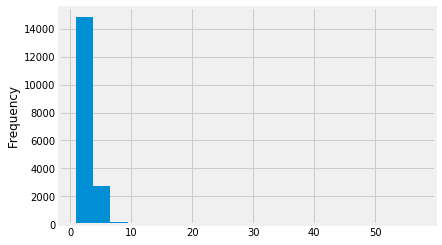

In [120]:
#What does the distribution of NumFloors look like?

ax = brooklyn.loc[:,"NumFloors"].plot(kind='hist', bins = 20)

In [121]:
brooklyn.loc[:, 'log_floor'] = np.log(brooklyn.loc[:, 'NumFloors'])

In [122]:
#BldgDepth is the building’s depth, which is the effective perpendicular distance, measured in feet.

brooklyn.loc[:,"BldgDepth"].value_counts()

55.00     1648
100.00    1637
50.00     1403
60.00     1096
45.00      695
40.00      653
90.00      604
65.00      557
80.00      517
70.00      496
75.00      354
52.00      295
35.00      279
62.00      257
56.00      225
48.00      223
85.00      212
58.00      197
95.00      186
54.00      185
64.00      182
57.00      167
42.00      165
68.00      160
30.00      156
72.00      142
200.00     123
47.00      120
63.00      120
66.00      115
          ... 
98.42        1
27.77        1
88.75        1
35.42        1
29.40        1
70.92        1
141.67       1
308.00       1
74.96        1
56.83        1
58.13        1
150.33       1
137.50       1
19.92        1
108.50       1
264.42       1
73.33        1
81.75        1
119.25       1
79.58        1
80.67        1
178.83       1
20.82        1
53.83        1
78.25        1
112.08       1
53.67        1
96.56        1
944.50       1
170.50       1
Name: BldgDepth, Length: 887, dtype: int64

In [123]:
#I am comfortable scrubbing all zero values for BldgDepth

brooklyn = brooklyn[brooklyn.BldgDepth != 0]

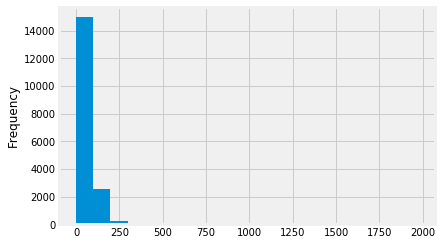

In [124]:
#What does the distribution of BldgDepth look like?

ax = brooklyn.loc[:,"BldgDepth"].plot(kind='hist', bins = 20)

In [125]:
brooklyn.loc[:, 'log_depth'] = np.log(brooklyn.loc[:, 'BldgDepth'])

In [126]:
#The maximum allowable commercial floor area ratio.

#The maximum allowable commercial floor area ratios are exclusive of bonuses for plazas, plaza-connected open areas, 
#arcades, or other amenities.

#CommFar might be useful, but the amount of zeroes makes me uneasy. I don't know enough about real-estate to assess this value
#so I will not use it in the model

brooklyn.loc[:,"CommFAR"].value_counts()

0.0     13162
2.0      1918
1.0      1690
3.4       441
4.0       275
3.0       167
10.0       75
12.0       57
4.2        38
6.0        22
5.0         6
0.5         5
Name: CommFAR, dtype: int64

In [127]:
#LotDepth is the tax lot's depth measured in feet.

brooklyn.loc[:,"LotDepth"].value_counts()

100.00    6431
80.00     1182
90.00      655
75.00      449
100.17     417
95.00      248
200.00     236
60.00      204
70.00      163
50.00      163
85.00      158
110.00     111
105.00     103
125.00      86
120.00      78
82.00       64
150.00      63
40.00       63
97.50       61
96.67       53
86.00       50
92.00       48
55.00       47
95.17       39
78.00       38
52.50       37
77.00       37
100.33      37
97.83       37
72.00       37
          ... 
215.75       1
116.67       1
159.17       1
205.00       1
58.83        1
47.17        1
89.48        1
104.38       1
99.80        1
59.92        1
405.00       1
101.01       1
39.83        1
155.17       1
59.42        1
106.98       1
150.65       1
147.83       1
67.25        1
151.33       1
174.50       1
50.25        1
41.83        1
107.42       1
152.00       1
149.08       1
230.25       1
146.58       1
837.08       1
141.60       1
Name: LotDepth, Length: 1621, dtype: int64

In [128]:
#I am comfortable scrubbing all zero values for LotDepth

brooklyn = brooklyn[brooklyn.LotDepth != 0]

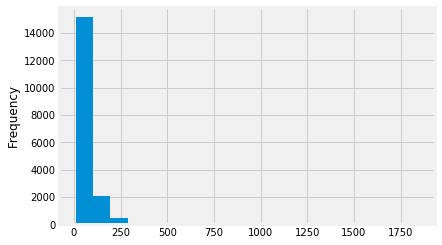

In [129]:
#What does the distribution of LotDepth look like?

ax = brooklyn.loc[:,"LotDepth"].plot(kind='hist', bins = 20)

In [130]:
brooklyn.loc[:, 'log_lotdepth'] = np.log(brooklyn.loc[:, 'LotDepth'])

In [131]:
#UnitsTotal is the sum of residential and non-residential (offices, retail stores, etc.) units for all buildings on the tax lot.

#The count of non-residential units is sometimes not available if the building contains residential units.

#Non-residential units are units with a separate use. If a building has 25 different offices it would be counted as 1 unit 
#because they have the same use.

brooklyn.loc[:,"UnitsTotal"].value_counts()

3.0      4908
1.0      4077
2.0      2678
4.0      1424
5.0      1201
6.0       964
7.0       583
8.0       461
9.0       210
0.0       158
10.0      146
11.0       78
15.0       50
16.0       49
12.0       44
13.0       40
17.0       39
14.0       35
23.0       31
24.0       28
20.0       26
18.0       24
25.0       24
33.0       23
21.0       22
19.0       20
37.0       17
30.0       17
26.0       17
36.0       15
         ... 
127.0       1
197.0       1
204.0       1
120.0       1
153.0       1
439.0       1
115.0       1
272.0       1
235.0       1
159.0       1
166.0       1
252.0       1
187.0       1
82.0        1
97.0        1
144.0       1
378.0       1
371.0       1
288.0       1
183.0       1
92.0        1
237.0       1
110.0       1
147.0       1
158.0       1
119.0       1
355.0       1
129.0       1
184.0       1
199.0       1
Name: UnitsTotal, Length: 158, dtype: int64

In [132]:
#I am comfortable scrubbing all zero values for UnitsTotal

brooklyn = brooklyn[brooklyn.UnitsTotal != 0]

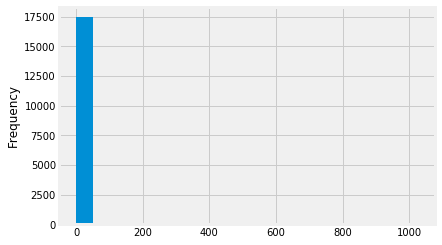

In [133]:
#What does the distribution of UnitsTotal look like?

ax = brooklyn.loc[:,"UnitsTotal"].plot(kind='hist', bins = 20)

In [134]:
brooklyn.loc[:, 'log_units'] = np.log(brooklyn.loc[:, 'UnitsTotal'])

In [135]:
#LotArea is the total area of the tax lot, expressed in square feet rounded to the nearest integer.

#LOT AREA contains street beds when the tax lot contains “paper streets” i.e., street mapped but not built.

brooklyn.loc[:,"LotArea"].value_counts()

2000.0     1725
2500.0     1124
1600.0      596
1800.0      371
4000.0      329
5000.0      286
1900.0      224
1500.0      213
10000.0     183
6000.0      144
1875.0      132
3000.0      109
1950.0      107
1700.0      103
2003.0      103
8000.0      101
2200.0      101
2100.0       98
2250.0       86
1200.0       86
1440.0       70
2400.0       68
7500.0       64
1520.0       62
3600.0       60
20000.0      58
2504.0       58
1400.0       56
1560.0       54
2600.0       52
           ... 
4443.0        1
7192.0        1
9577.0        1
657.0         1
2485.0        1
10028.0       1
7239.0        1
16730.0       1
11816.0       1
3128.0        1
7255.0        1
1854.0        1
2983.0        1
4392.0        1
6976.0        1
14160.0       1
3239.0        1
1847.0        1
3044.0        1
1623.0        1
1974.0        1
24524.0       1
3528.0        1
4416.0        1
4845.0        1
11718.0       1
4959.0        1
3814.0        1
4345.0        1
24850.0       1
Name: LotArea, Length: 3

In [136]:
#I am comfortable scrubbing all zero values for LotArea

brooklyn = brooklyn[brooklyn.LotArea != 0]

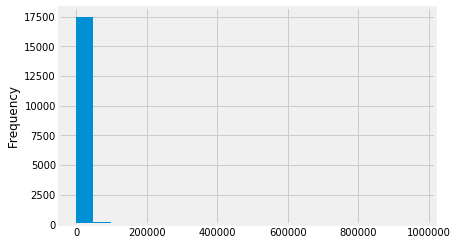

In [137]:
#What does the distribution of LotArea look like?

ax = brooklyn.loc[:,"LotArea"].plot(kind='hist', bins = 20)

In [138]:
brooklyn.loc[:, 'log_lotarea'] = np.log(brooklyn.loc[:, 'LotArea'])

# Final Model

I am going to build a model based on the log transformations of certain feature variables and the target variable

In [139]:
new_brooklyn = brooklyn.loc[:,['log_price','log_sqft','log_assess','log_area','log_lotarea','log_units','log_lotdepth','log_depth','log_front','log_floor','log_far', 'log_bldgarea', 'log_bldg']]

In [140]:
new_brooklyn.head()

,log_price,log_sqft,log_assess,log_area,log_lotarea,log_units,log_lotdepth,log_depth,log_front,log_floor,log_far,log_bldgarea,log_bldg
4,19.126250,12.782686,17.117479,10.308953,9.916749,0.000000,4.608465,4.608465,5.308268,2.708050,2.890372,12.782686,5.308268
6,18.957174,12.579152,17.158708,12.579152,9.433484,4.624973,4.828314,4.828314,4.605170,3.610918,3.135494,12.579152,4.521789
7,18.945409,12.395717,16.992132,10.236382,10.823232,5.468060,5.298317,4.605170,6.255750,1.791759,1.609438,12.395717,6.214608
9,18.896915,13.212204,16.239871,13.212204,11.642198,0.000000,5.318120,4.393461,6.343880,2.079442,1.609438,13.212204,5.717028
13,18.743535,12.441524,16.662609,12.441524,9.938082,0.693147,5.327876,5.323010,4.615121,2.397895,2.484907,12.441524,4.605170


In [141]:
new_brooklyn.corr().loc[:, 'log_price'].sort_values(ascending=False)

log_price       1.000000
log_assess      0.303991
log_bldgarea    0.293660
log_sqft        0.286201
log_area        0.245051
log_lotarea     0.243917
log_bldg        0.242041
log_front       0.239864
log_depth       0.170753
log_lotdepth    0.125975
log_units       0.114461
log_floor       0.099972
log_far         0.095332
Name: log_price, dtype: float64

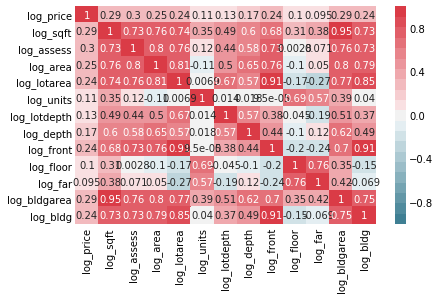

In [142]:
#Here is a heatmap of the new model, it does not look very pleasing

ax = sns.heatmap(new_brooklyn.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21))

In [143]:
#Instead here is a plain correlation table

#There are several relationships between variables that look like they suffer from collinearity

#I will make a cut off at 90% correlation

#log_bldgarea is 94% correlated with log_sqft, I'm going to drop log_sqft since that is less correlated to log_price

#log_front is 91% correlated with log_lotarea. I'm going to drop log_front since that is less correlated to log_price

#log_bldg is 91% correlated with log_front. However, log_front is already being dropped

new_brooklyn.corr()

,log_price,log_sqft,log_assess,log_area,log_lotarea,log_units,log_lotdepth,log_depth,log_front,log_floor,log_far,log_bldgarea,log_bldg
log_price,1.000000,0.286201,0.303991,0.245051,0.243917,0.114461,0.125975,0.170753,0.239864,0.099972,0.095332,0.293660,0.242041
log_sqft,0.286201,1.000000,0.728382,0.761290,0.738226,0.351034,0.493919,0.604059,0.683001,0.311592,0.377423,0.948319,0.727283
log_assess,0.303991,0.728382,1.000000,0.803170,0.755280,0.122923,0.438641,0.579967,0.732316,0.002794,0.071287,0.760321,0.731318
log_area,0.245051,0.761290,0.803170,1.000000,0.808336,-0.113259,0.500784,0.652578,0.763835,-0.104807,0.049579,0.795975,0.788664
log_lotarea,0.243917,0.738226,0.755280,0.808336,1.000000,0.006949,0.673951,0.572497,0.912178,-0.166342,-0.266266,0.766314,0.848430
log_units,0.114461,0.351034,0.122923,-0.113259,0.006949,1.000000,0.013772,0.018091,0.000095,0.692436,0.574541,0.389596,0.040068
log_lotdepth,0.125975,0.493919,0.438641,0.500784,0.673951,0.013772,1.000000,0.570068,0.381041,-0.044875,-0.190603,0.508883,0.368682
log_depth,0.170753,0.604059,0.579967,0.652578,0.572497,0.018091,0.570068,1.000000,0.435159,-0.104712,0.123655,0.622688,0.494250
log_front,0.239864,0.683001,0.732316,0.763835,0.912178,0.000095,0.381041,0.435159,1.000000,-0.196998,-0.235639,0.703902,0.905485
log_floor,0.099972,0.311592,0.002794,-0.104807,-0.166342,0.692436,-0.044875,-0.104712,-0.196998,1.000000,0.762293,0.351181,-0.151955


In [144]:
final_brooklyn = brooklyn.loc[:,['log_price','log_assess','log_area','log_lotarea','log_units','log_lotdepth','log_depth','log_floor','log_far', 'log_bldgarea', 'log_bldg','tax_class_at_sale','SanitDistr','PolicePrct','SchoolDist']]

In [145]:
final_brooklyn.head()

,log_price,log_assess,log_area,log_lotarea,log_units,log_lotdepth,log_depth,log_floor,log_far,log_bldgarea,log_bldg,tax_class_at_sale,SanitDistr,PolicePrct,SchoolDist
4,19.126250,17.117479,10.308953,9.916749,0.000000,4.608465,4.608465,2.708050,2.890372,12.782686,5.308268,4,2.0,84.0,13.0
6,18.957174,17.158708,12.579152,9.433484,4.624973,4.828314,4.828314,3.610918,3.135494,12.579152,4.521789,4,2.0,84.0,13.0
7,18.945409,16.992132,10.236382,10.823232,5.468060,5.298317,4.605170,1.791759,1.609438,12.395717,6.214608,2,1.0,94.0,14.0
9,18.896915,16.239871,13.212204,11.642198,0.000000,5.318120,4.393461,2.079442,1.609438,13.212204,5.717028,4,2.0,88.0,14.0
13,18.743535,16.662609,12.441524,9.938082,0.693147,5.327876,5.323010,2.397895,2.484907,12.441524,4.605170,4,2.0,84.0,13.0


In [146]:
final_brooklyn = pd.get_dummies(final_brooklyn, columns=['tax_class_at_sale','SanitDistr','PolicePrct','SchoolDist'], drop_first=True)

In [147]:
#Separating the variables between X and y

X3 = final_brooklyn.drop('log_price', axis='columns')
y3 = final_brooklyn.loc[:, 'log_price']

In [148]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .3, random_state=30)

In [149]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
#Scoring the model on the training set and test set.

print(lr.score(X3_train, y3_train))
print(lr.score(X3_test, y3_test))

0.15640203852782875
0.10636996016345523


### Observations

Not so good

# Random Forest Regression Part 2

In [151]:
#Separating the variables between X and y

X4 = final_brooklyn.drop('log_price', axis='columns')
y4 = final_brooklyn.loc[:, 'log_price']

In [152]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = .3, random_state=30)

In [153]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X4_train, y4_train)
print(rfr.score(X4_train, y4_train))
print(rfr.score(X4_test, y4_test))

0.7620429924984005
-0.003304150802541983


Once again just awful. Random Forest Regression has not worked out well for this dataset.

# Notes/Observations

1. I got a MemoryError when I tried to do a regression with many Dummy Variables. I had to decrease the amount of explanatory variables in order to avoid the memory error. new_regression = pd.get_dummies(new_regression, columns=['zip_code','tax_class_at_sale','block','lot','neighborhood','building_class_category','building_class_at_sale','SanitDistr','PolicePrct','SchoolDist'], drop_first=True)